In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

K-means algorithm is a method to automatically cluster similar data points together.

In [2]:
def find_closest_centroids(X , centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0] , dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    
    return idx

In [3]:
X = load_data()

In [4]:
print("First five elements of X are:\n" , X[:5])
print("The shape of X is:\n" , X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is:
 (300, 2)


In [5]:
initial_centroids = np.array([[3 , 3] , [6 , 2] , [8 , 5]])
idx = find_closest_centroids(X , initial_centroids)

print("First three elements of idx are:" , idx[:3])

First three elements of idx are: [0 2 1]


In [6]:
def compute_centroids(X , idx , K):
    m , n = X.shape
    centroids = np.zeros((K , n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points , axis = 0)
    
    return centroids

In [7]:
K = 3
centroids = compute_centroids(X , idx , K)

print("The centroids are:" , centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [8]:
def run_kMeans(X , initial_centroids , max_iters = 10 , plot_progress = False):
    m , n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9


K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


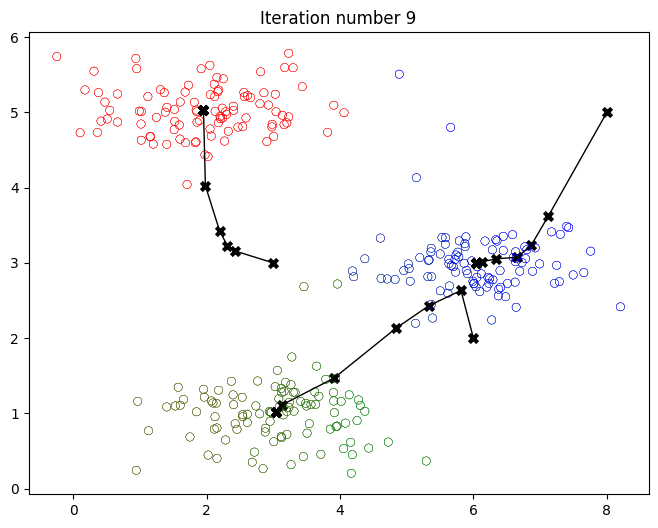

In [9]:
X = load_data()
initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [10]:
def kMeans_init_centroids(X , K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


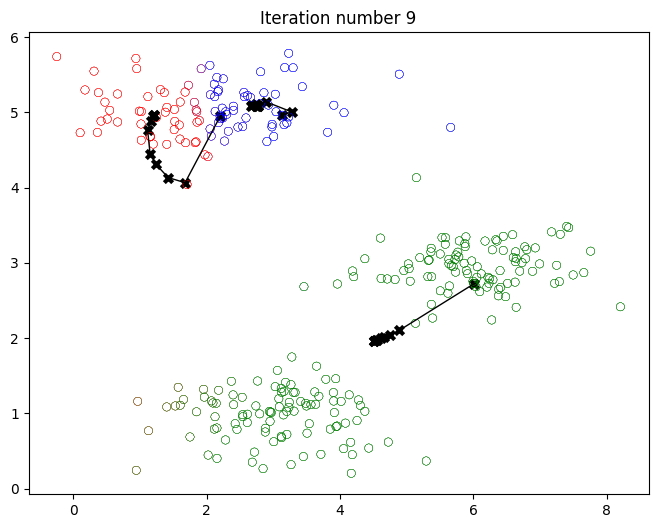

In [11]:
K = 3
max_iters = 10
initial_centroids = kMeans_init_centroids(X, K)
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

Image Compression

In [12]:
original_img = plt.imread('bird_small.png')

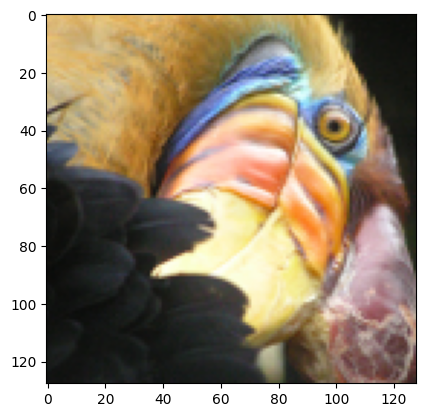

In [13]:
plt.imshow(original_img)

In [14]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [15]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [16]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [17]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [5 5 5 5 5]


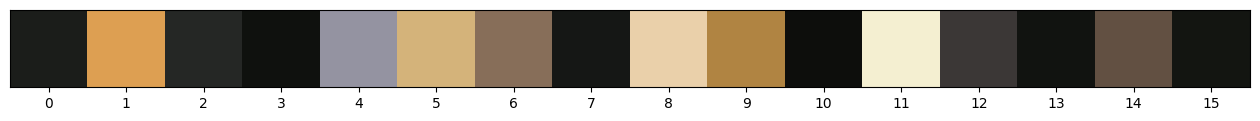

In [18]:
show_centroid_colors(centroids)

In [19]:
idx = find_closest_centroids(X_img, centroids)
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape) 

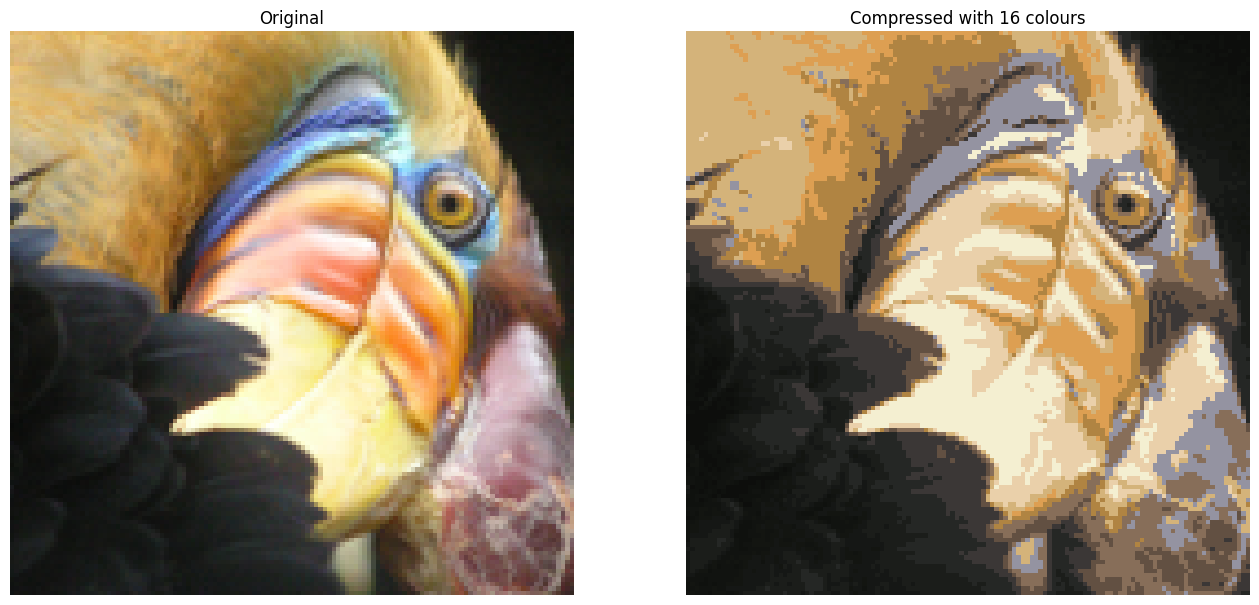

In [20]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()